In [134]:
import pandas as pd
import numpy as np
from scipy import stats
from matplotlib import pyplot as plt

In [135]:
# 1 

In [136]:
df = pd.read_csv('/home/vika/Рабочий стол/hockey_players.csv')

In [137]:
df_FIN = df.loc[df.country == 'FIN']
df_NOR = df.loc[df.country == 'NOR']
df_DEN = df.loc[df.country == 'DEN']

y1 = np.array(df_FIN['height'])
y2 = np.array(df_NOR['height'])
y3 = np.array(df_DEN['height'])

n1 = y1.shape[0]
n2 = y2.shape[0]
n3 = y3.shape[0]
n1, n2, n3

(396, 290, 340)

In [138]:
y1_mean = y1.mean()
y2_mean = y2.mean()
y3_mean = y2.mean()
y1_mean, y2_mean, y3_mean

(183.86868686868686, 182.94137931034481, 182.94137931034481)

In [139]:
y = np.concatenate([y1, y2, y3])

print(y)

[184 178 178 ... 188 186 176]


In [140]:
y_mean = y.mean()
y_mean

183.65009746588694

In [141]:
SS_b = n1 * (y1_mean - y_mean) ** 2 + n2 * (y2_mean - y_mean) ** 2 + n3 * (y3_mean - y_mean) ** 2

SS_w = ((y1 - y1_mean) ** 2).sum() + ((y2 - y2_mean) ** 2).sum() + ((y3 - y3_mean) ** 2).sum()

SS_b, SS_w

(335.3587026153788, 25064.205605400028)

In [142]:
k = 3
n = n1 + n2 + n3

k1 = k - 1
k2 = n - k

sigma2_b = SS_b / k1
sigma2_w = SS_w / k2

sigma2_b, sigma2_w

(167.6793513076894, 24.500689741349)

In [143]:
F = sigma2_b / sigma2_w
F

6.843862482153003

In [144]:
alpha = 0.05

t = stats.f.ppf(1 - alpha, k1, k2)
t

3.0045220661840073

In [145]:
#значение статистики попало в критическую область. Это значит, что отличие роста является значимым

In [198]:
# 2

In [199]:
samples = np.load('/home/vika/Загрузки/matrix.npy')

In [200]:
samples_centered = samples - samples.mean(axis=0)

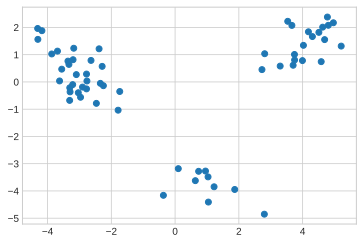

In [201]:
plt.scatter(samples_centered[:, 0], samples_centered[:, 1])

In [202]:
from sklearn.decomposition import PCA

In [203]:
pca = PCA().fit(samples)

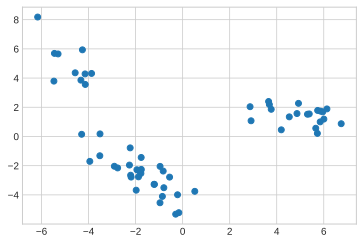

In [204]:
plt.scatter(pca.transform(samples)[:, 0], pca.transform(samples)[:, 1])

In [197]:
pca.explained_variance_ratio_

array([0.56462789, 0.3655208 , 0.02172736, 0.01966278, 0.00790586,
       0.00642052, 0.00566595, 0.0040327 , 0.00229135, 0.00214479])